In [1]:
from transformers import AutoTokenizer
from datasets import load_dataset
from tqdm import tqdm
import numpy as np
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")
text = "Fontos hír volt néhány évvel ezelőtt a különböző, lakásvásárlást, felújítást vagy bővítést segítő családtámogatások bejelentése."
print(tokenizer(text).tokens())

['Font', 'os', 'Ġh', 'ÃŃ', 'r', 'Ġvolt', 'Ġn', 'Ã©', 'h', 'Ã¡', 'ny', 'ĠÃ©', 'v', 'vel', 'Ġe', 'zel', 'Å', 'ĳ', 'tt', 'Ġa', 'Ġk', 'Ã¼', 'l', 'Ã¶', 'nb', 'Ã¶', 'z', 'Å', 'ĳ', ',', 'Ġl', 'ak', 'Ã¡', 'sv', 'Ã¡s', 'Ã¡', 'rl', 'Ã¡', 'st', ',', 'Ġfel', 'Ãº', 'j', 'ÃŃ', 't', 'Ã¡', 'st', 'Ġvag', 'y', 'Ġb', 'Å', 'ĳ', 'v', 'ÃŃ', 't', 'Ã©', 'st', 'Ġse', 'g', 'ÃŃ', 't', 'Å', 'ĳ', 'Ġc', 'sal', 'Ã¡', 'dt', 'Ã¡', 'm', 'og', 'at', 'Ã¡s', 'ok', 'Ġbe', 'j', 'el', 'ent', 'Ã©', 'se', '.']


In [3]:
print(f"Size of gpt2 vocabulary: {len(tokenizer)}")

Size of gpt2 vocabulary: 50257


In [4]:
tokens = sorted(tokenizer.vocab.items(), key=lambda x: len(x[0]), reverse=True)
longests = [tokenizer.convert_tokens_to_string([t]) for t, _ in tokens[:10]]
for i in longests:
    print(i)

ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ
 ----------------------------------------------------------------
................................................................
----------------------------------------------------------------
ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ
________________________________________________________________
--------------------------------------------------------
————————————————


In [5]:
tokens = sorted(tokenizer.vocab.items(), key=lambda x: x[1], reverse=True)
print([f"{tokenizer.convert_tokens_to_string([t])}" for t, _ in tokens[:10]])

['<|endoftext|>', ' gazed', ' informants', ' Collider', ' regress', 'ominated', ' amplification', 'Compar', '…."', ' (/']


In [6]:
length = 3992000
dataset_name = "data/Guttenberg/"
files = os.listdir(dataset_name)
files = [dataset_name + i for i in files if ".txt" in i]

In [7]:
dataset = load_dataset("text",  split="train", streaming=True, data_files=files, )

Resolving data files:   0%|          | 0/4285 [00:00<?, ?it/s]

Using custom data configuration default-68fc5f74f150e42e


In [8]:
dataset

In [9]:
iter_dataset = iter(dataset)

def batch_iterator(batch_size = 10):
    for i in tqdm(range(0, length, batch_size)):
        yield [next(iter_dataset)["text"] for _ in range(batch_size)]


In [10]:
texts = [next(iter_dataset)["text"][:1024] for _ in range(10)]

In [15]:
iter_dataset = iter(dataset)
count = 0
old_tokenizer_count = 0
batch_size = 64
for i in tqdm(range(0, 3033000, batch_size)):
    texts = [next(iter_dataset)["text"] for _ in range(batch_size)]
    count += np.sum([len(text) for text in texts])
    old_tokenizer_count += np.sum([len(i) for i in tokenizer(texts)["input_ids"]])
print(f"Characters counted: {count}")
print(f"Old tokenizer used {old_tokenizer_count} number of tokens")
print(f"{count/old_tokenizer_count} chars per token")

100%|██████████| 47391/47391 [01:15<00:00, 626.97it/s]

Characters counted: 132233143
Old tokenizer used 66440077 number of tokens
1.9902617361506068 chars per token


In [16]:
iter_dataset = iter(dataset)
new_tokenizer = tokenizer.train_new_from_iterator(batch_iterator(), vocab_size=25600, )

100%|██████████| 399200/399200 [01:59<00:00, 3347.07it/s]


In [17]:
new_tokenizer.save_pretrained("./models/guttenberg/")

('./models/guttenberg/tokenizer_config.json',
 './models/guttenberg/special_tokens_map.json',
 './models/guttenberg/vocab.json',
 './models/guttenberg/merges.txt',
 './models/guttenberg/added_tokens.json',
 './models/guttenberg/tokenizer.json')

In [13]:
# load pretrained tokenizer

tokenizer = AutoTokenizer.from_pretrained("./models/guttenberg/")

In [18]:
tokens = sorted(new_tokenizer.vocab.items(), key=lambda x: len(x[0]), reverse=True)
longests = [new_tokenizer.convert_tokens_to_string([t]) for t, _ in tokens[:10]]
for i in longests:
    print(i)

 megválasztásáról
 Természettudományi
 irodalomtörténész
 felhasználásával
 teherszállításra
 végrehajtásáról
 Gazdaságtudományi
 létrehozásáról
 környezetvédelmi
 születésnapjára


In [19]:
tokens = sorted(new_tokenizer.vocab.items(), key=lambda x: x[1], reverse=True)
print([f"{new_tokenizer.convert_tokens_to_string([t])}" for t, _ in tokens[:100]])

[' őrmester', ' impl', 'ÉSZ', ' Gyors', ' bizonynyal', ' országában', ' valamennyit', ' esnek', ' Off', ' Wol', ' élvonal', ' 219', ' Láttam', ' Göd', ' HA', 'oztatták', ' meglovag', ' röhög', 'okoll', ' húr', 'uet', ' köhög', ' leszármazottja', ' túlélő', 'scar', ' hódító', 'leányt', ' mennyei', 'kérdé', ' Legnagyobb', ' Edge', ' nyilvánította', ' educ', ' vadonban', ' jólét', 'visszav', ' recs', ' visszaáll', ' félni', 'asztos', ' Rok', 'korong', ' gén', ' lepl', ' kiépítés', ' csóv', 'élem', ' fészek', 'ates', 'ο', 'tig', ' sajtótájékoztat', ' period', ' divatos', ' Gondolat', ' ötvenes', ' Julian', ' megmondta', ' 1889', ' ellátó', ' Európába', ' szükségem', ' szentély', ' vélték', ' választáson', 'alacz', ' államot', ' 154', ' nyomott', ' munkában', ' nevü', ' 222', ' cigarett', '–),', 'szim', 'rúg', 'küzd', ' lakótelep', ' Érsekújvár', ' However', 'Francia', ' bővítése', ' kimondta', 'aleány', 'ically', ' kifoszt', ' visszatérni', ' tájban', ' vetették', ' felvétele', 'Albus', ' 

In [21]:
iter_dataset = iter(dataset)
count = 0
old_tokenizer_count = 0
for i in tqdm(range(340_000)):
    text = next(iter_dataset)["text"]
    count += len(text)
    old_tokenizer_count += len(new_tokenizer(text[:1024])["input_ids"])
print(f"Characters counted: {count}")
print(f"Old tokenizer used {old_tokenizer_count} number of tokens")
print(f"{count/old_tokenizer_count} chars per token")

100%|██████████| 340000/340000 [00:52<00:00, 6533.20it/s]

Characters counted: 18128399
Old tokenizer used 4534446 number of tokens
3.997930287404459 chars per token


In [22]:
tokens = sorted(new_tokenizer.vocab.items(), key=lambda x: x[1], reverse=True)
tokens = [f"{new_tokenizer.convert_tokens_to_string([t])}" for t, _ in tokens]


Text(0.5, 1.0, 'Length of an average token')

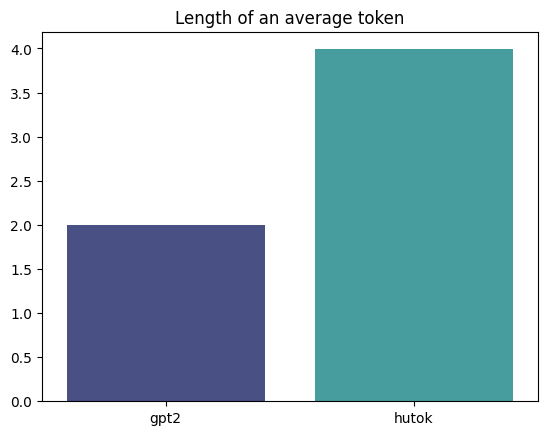

In [25]:
df = pd.DataFrame.from_dict({"gpt2":[2.00], "hutok": [3.99]})
sns.barplot(df, palette="mako")
plt.title("Length of an average token")

In [27]:
def check_most_common_words(tokenizer_):
    tokens = sorted(tokenizer_.vocab.items(), key=lambda x: x[1], reverse=True)
    tokens = [f"{tokenizer_.convert_tokens_to_string([t])}" for t, _ in tokens]
    most_common_words = []
    with open("data/common_words.txt", encoding="utf-8") as f:
        most_common_words = f.read().splitlines()
    cnt = 0
    returns = {}
    for word, idx in zip(most_common_words,range(len(most_common_words))):
        if word in tokens:
            cnt += 1
        if idx == 100:
            returns[100] = cnt
        elif idx == 250:
            returns[250] = cnt
        elif idx == 500:
            returns[500] = cnt
        elif idx == 1000:
            returns[1000] = cnt
    return returns


In [36]:
results = check_most_common_words(new_tokenizer)
results_gpt = check_most_common_words(tokenizer)

In [56]:
df = pd.DataFrame(columns=["tokenizer", "percentage", "number of words"])
for key, value in results.items():
    df.loc[len(df)] = ["hutok", value/key*100, key]
   
for key, value in results_gpt.items():
    df.loc[len(df)] = ["gpt2", value/key*100, key]

Text(0.5, 1.0, 'Percentage of most common words in vocab per tokenizer')

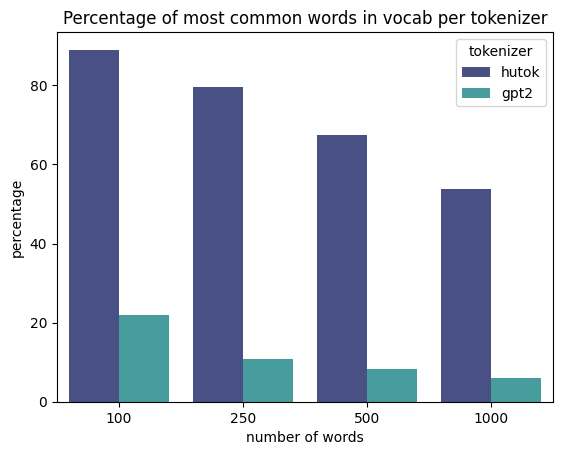

In [60]:
sns.barplot(data=df, x="number of words", y="percentage", hue="tokenizer", palette="mako")
plt.title("Percentage of most common words in vocab per tokenizer")

In [82]:
from collections import defaultdict

def subword_fertility(tokenizer):
    my_dict = defaultdict(int)
    iter_dataset = iter(dataset)
    count = 0


    for i in tqdm(range(1000)):
        text = next(iter_dataset)["text"]
        # count += len(text)
        words = text.split()
        count += len(words)
        for word in words:
            token_cnt = len(tokenizer(word)["input_ids"])
            my_dict[token_cnt] += 1
        # old_tokenizer_count += len(new_tokenizer(text[:1024])["input_ids"])
    return my_dict, count

def subword_fertility_english(tokenizer):
    my_dict = defaultdict(int)
    count = 0
    text = ""
    with open("data/english.txt", encoding="utf-8") as f:
        text = f.read()
    words = text.split()
    count += len(words)
    for word in words:
        token_cnt = len(tokenizer(word)["input_ids"])
        my_dict[token_cnt] += 1
    # old_tokenizer_count += len(new_tokenizer(text[:1024])["input_ids"])
    return my_dict, count


In [84]:
results, count  = subword_fertility(new_tokenizer)
results_gpt, count = subword_fertility(tokenizer)


100%|██████████| 1000/1000 [00:04<00:00, 222.66it/s]


Text(0.5, 1.0, 'Subword fertility for Hungarian text')

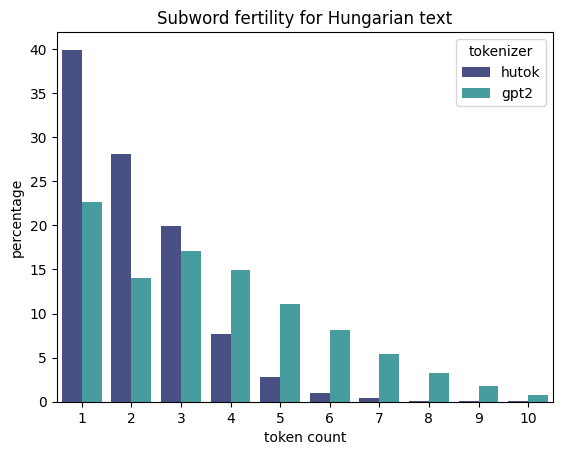

In [85]:
df = pd.DataFrame(columns=["tokenizer", "percentage", "token count"])
for key, value in results.items():
    if key > 10:
        continue
    df.loc[len(df)] = ["hutok", value/count*100, key]
   
for key, value in results_gpt.items():
    if key > 10:
        continue
    df.loc[len(df)] = ["gpt2", value/count*100, key]
sns.barplot(data=df, x="token count", y="percentage", hue="tokenizer", palette="mako")
plt.title("Subword fertility for Hungarian text")

Text(0.5, 1.0, 'Subword fertility for English text')

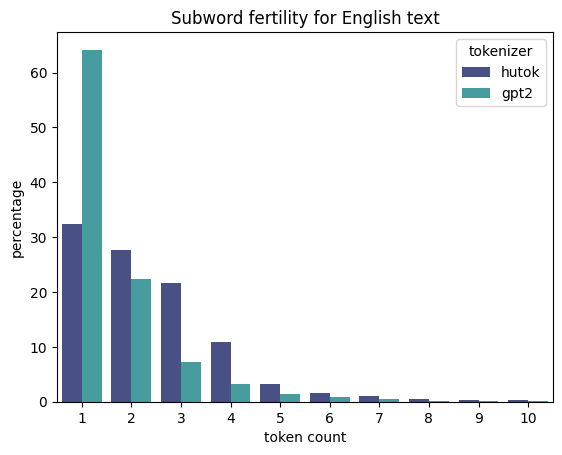

In [83]:
results, count  = subword_fertility_english(new_tokenizer)
results_gpt, count = subword_fertility_english(tokenizer)

df = pd.DataFrame(columns=["tokenizer", "percentage", "token count"])
for key, value in results.items():
    if key > 10:
        continue
    df.loc[len(df)] = ["hutok", value/count*100, key]
   
for key, value in results_gpt.items():
    if key > 10:
        continue
    df.loc[len(df)] = ["gpt2", value/count*100, key]
sns.barplot(data=df, x="token count", y="percentage", hue="tokenizer", palette="mako")
plt.title("Subword fertility for English text")

In [15]:
from collections import defaultdict

def average_word_len():
    my_dict = defaultdict(int)
    iter_dataset = iter(dataset)
    count = 0
    for i in tqdm(range(1000)):
        text = next(iter_dataset)["text"]
        # count += len(text)
        words = text.split()
        count += len(words)
        for word in words:
            my_dict[len(word)] += 1
        # old_tokenizer_count += len(new_tokenizer(text[:1024])["input_ids"])
    return my_dict, count

def average_word_len_english():
    my_dict = defaultdict(int)
    count = 0
    text = ""
    with open("data/english.txt", encoding="utf-8") as f:
        text = f.read()
    words = text.split()
    count += len(words)
    for word in words:
        my_dict[len(word)] += 1
    # old_tokenizer_count += len(new_tokenizer(text[:1024])["input_ids"])
    return my_dict, count

100%|██████████| 1000/1000 [00:00<00:00, 26510.99it/s]


Text(0.5, 1.0, 'Word length by language')

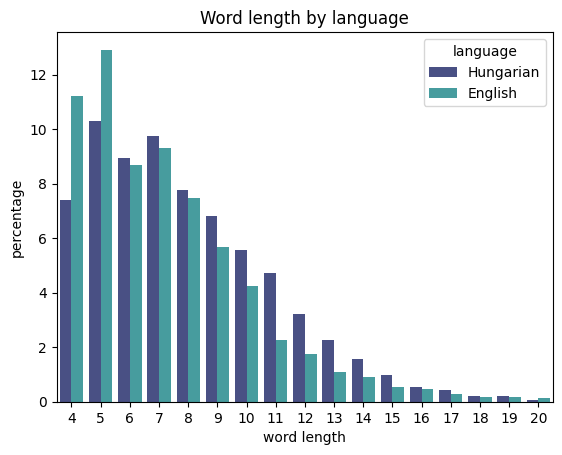

In [21]:
results, count  = average_word_len()
results_gpt, count = average_word_len_english()

df = pd.DataFrame(columns=["language", "percentage", "word length"])
for key, value in results.items():
    if key > 20 or key < 4:
        continue
    df.loc[len(df)] = ["Hungarian", value/count*100, key]
   
for key, value in results_gpt.items():
    if key > 20 or key < 4:
        continue
    df.loc[len(df)] = ["English", value/count*100, key]
sns.barplot(data=df, x="word length", y="percentage", hue="language", palette="mako")
plt.title("Word length by language")

defaultdict(int,
            {2: 1743,
             4: 1418,
             11: 900,
             1: 1789,
             5: 1971,
             9: 1302,
             7: 1862,
             6: 1712,
             3: 1127,
             10: 1066,
             8: 1484,
             12: 615,
             14: 297,
             13: 433,
             20: 15,
             17: 80,
             15: 185,
             21: 14,
             19: 37,
             18: 43,
             24: 5,
             16: 101,
             22: 6,
             25: 1,
             36: 1,
             23: 2,
             28: 1,
             32: 1})